# Data Science Academy
# Business Analytics
# Projeto 1 - Segmentação de Clientes de Food Delivery

O objetivo do projeto é a exploração dos dados com a finalidade de descobrir indicadores 
para tomadas de decisões comerciais.

Segmentar os clientes por perfil dos pedidos facilitando a tomadade decisão, 
identificando possíveis oportunidades de negócios para aumento de vendas.


# Importação dos Pacotes 

In [1]:
# Pacotes de Machine Learning
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import sklearn
# Pacotes de manipulação de dados
import time 
import datetime 
import pandas as pd
import numpy as np
# Pacotes de vizualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlt

plt.style.use('fivethirtyeight')
plt.figure(1,figsize=(15,6))

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Importação do Dataset e Tratamento dos Dados

In [2]:
# Importação do Dataset
data_frame = pd.read_csv('dados/dataset.csv', encoding= 'utf-8')

In [3]:
# Shape do data frame
data_frame.shape

(260645, 7)

In [4]:
# Primeiras Linhas do Dataframe
data_frame.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059


In [5]:
# Valores únicos de cada variável
data_frame.nunique()

id_transacao       100000
horario_pedido      76799
localidade              9
nome_item               4
quantidade_item         5
latitude                9
longitude               9
dtype: int64

In [6]:
# Tipos de objetos
data_frame.dtypes

id_transacao        object
horario_pedido      object
localidade           int64
nome_item           object
quantidade_item      int64
latitude           float64
longitude          float64
dtype: object

In [7]:
# Descrição estatísticas dos dados
data_frame.describe()

,localidade,quantidade_item,latitude,longitude
count,260645.000000,260645.000000,260645.000000,260645.000000
mean,5.134904,2.447010,41.836095,-87.733930
std,2.551846,1.330863,0.144459,0.136369
min,1.000000,1.000000,41.524598,-88.010140
25%,3.000000,1.000000,41.784576,-87.849468
50%,5.000000,2.000000,41.881818,-87.677606
75%,7.000000,4.000000,41.889047,-87.627059
max,9.000000,5.000000,42.049306,-87.607565


# Criação de uma tabela com o número de pedidos por ID de cada transação

In [8]:
total_pedidos = []
# Loop para criar a tabela com a quantidade de pedidos por transação


In [18]:
%time
for i,group in data_frame.groupby('id_transacao') :
    for k,j in group.groupby('horario_pedido') :
     
        id_transacao = i 
        horario_pedido = k
        localidade = j['localidade'].values.tolist()[0]
        bebida = 0
        pizza = 0
        sobremesa = 0
        salada = 0
        j = j.reset_index(drop = True)
        
        for i in range(len(j)) :
            num = j.loc[i,'quantidade_item']
            item = j.loc[i,'nome_item']
            
            if item == 'bebida' :
                    bebida = bebida +num 
            elif item == 'pizza':
                    pizza = pizza + num 
            elif item == 'sobremesa':
                    sobremesa = sobremesa + num 
            elif item == 'salada' :
                    salada = salada + num 
            
        output = [id_transacao, horario_pedido,localidade,bebida,pizza,sobremesa,salada]
        total_pedidos.append(output)


Wall time: 0 ns


In [19]:
# Convertendo a lista em Dataframe

df = pd.DataFrame(total_pedidos)

In [20]:
df.to_csv('total_pedidos.csv')

In [2]:
df = pd.read_csv("total_pedidos.csv")

In [3]:
# Ajustando o nomes das colunas 

df.columns = ['Index','id_transacao', 'horario_pedido','localidade','bebida','pizza','sobremesa','salada']

In [4]:
# Vizualição das 5 primeiras linhas
df.head()

,Index,id_transacao,horario_pedido,localidade,bebida,pizza,sobremesa,salada
0,0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0
1,1,0x100058,2019-05-05 00:08:00,6,0,2,2,0
2,2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1
3,3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0
4,4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0


# Análise Exploratória do novo data set

In [5]:
# Shape
df.shape

(200000, 8)

In [6]:
df.head()

,Index,id_transacao,horario_pedido,localidade,bebida,pizza,sobremesa,salada
0,0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0
1,1,0x100058,2019-05-05 00:08:00,6,0,2,2,0
2,2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1
3,3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0
4,4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0


In [7]:
# Análise descritiva
df.describe()

,Index,localidade,bebida,pizza,sobremesa,salada
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,99999.500000,5.004700,1.239590,1.857840,2.569210,0.711370
std,57735.171256,2.544805,1.627882,1.588585,1.332081,1.086521
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,49999.750000,3.000000,0.000000,1.000000,1.000000,0.000000
50%,99999.500000,5.000000,0.000000,1.000000,2.000000,0.000000
75%,149999.250000,7.000000,3.000000,3.000000,4.000000,1.000000
max,199999.000000,9.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
# Verificando a existência de valores NAs
df.isna().sum()

Index             0
id_transacao      0
horario_pedido    0
localidade        0
bebida            0
pizza             0
sobremesa         0
salada            0
dtype: int64

In [9]:
# Shape
df.shape

(200000, 8)

In [10]:
# Extraindo o mês da coluna horario_pedido.

df["mes"] = df["horario_pedido"].apply(lambda x : time.strftime('%m',time.strptime(x,'%Y-%m-%d %H:%M:%S')))

In [11]:
df['dia_semana'] = df['horario_pedido'].apply(lambda x : time.strftime('%a',time.strptime(x,'%Y-%m-%d %H:%M:%S')))

In [12]:
df.head()

,Index,id_transacao,horario_pedido,localidade,bebida,pizza,sobremesa,salada,mes,dia_semana
0,0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0,01,Tue
1,1,0x100058,2019-05-05 00:08:00,6,0,2,2,0,05,Sun
2,2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1,01,Mon
3,3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0,02,Sat
4,4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0,06,Sun


In [17]:
df_soma = df[['localidade','bebida','pizza','sobremesa','salada','dia_semana']]

In [18]:
df_group_localidade = df_soma.groupby('localidade')['bebida','pizza','sobremesa','salada'].sum().reset_index()

In [19]:
df_group_localidade

,localidade,bebida,pizza,sobremesa,salada
0,1,8624,14740,40660,25920
1,2,15390,54900,61328,6428
2,3,8862,15448,41214,25766
3,4,60020,66464,74980,8516
4,5,8828,14084,39886,25802
5,6,15878,55488,61988,6500
6,7,59806,66420,75114,8694
7,8,10702,17120,43348,26228
8,9,59808,66904,75324,8420


In [21]:
df_group_localidade['Total'] = df_group_localidade.bebida + df_group_localidade.pizza + df_group_localidade.sobremesa+ df_group_localidade.salada

In [22]:
# Podemos tirar alguns insighs interessantes olhando a Tabela abaixo 
# Alta quantidade de Pizzas geralmente acompanha alta quantidade de bebidas e sobremesas - 4/7/9
# Regiões que mas vendem saladas vendem baixo número de pizzas e bebidas e uma quantidade considerável de sobremesas - 8/5/3/1

df_group_localidade

,localidade,bebida,pizza,sobremesa,salada,Total
0,1,8624,14740,40660,25920,89944
1,2,15390,54900,61328,6428,138046
2,3,8862,15448,41214,25766,91290
3,4,60020,66464,74980,8516,209980
4,5,8828,14084,39886,25802,88600
5,6,15878,55488,61988,6500,139854
6,7,59806,66420,75114,8694,210034
7,8,10702,17120,43348,26228,97398
8,9,59808,66904,75324,8420,210456


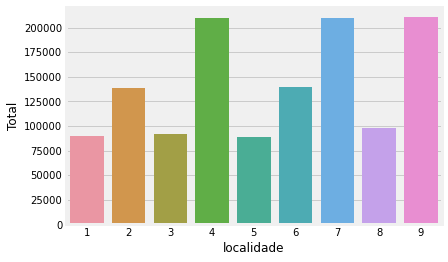

In [23]:
# Localidades com maiores quantidade de pedidos 
# 9 , 7 , 4 estas localidades pedem em maior quantidade .
sns.barplot(x = df_group_localidade.localidade, y = df_group_localidade.Total )
plt.show()

In [26]:
df_group_localidade_total_prod = df_group_localidade[['bebida','pizza','sobremesa','salada']].sum()

In [29]:
# Sobremesa , Pizza , Bebida são os itens mais pedidos.

df_group_localidade_total_prod.sort_values(ascending= False)

sobremesa    513842
pizza        371568
bebida       247918
salada       142274
dtype: int64

# Displot com a frequência da quantidade de itens 

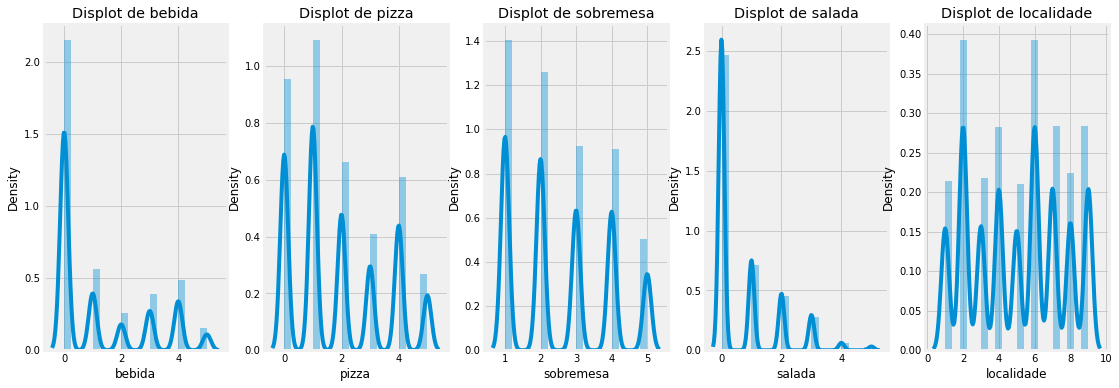

In [18]:
# Plot

plt.figure(1,figsize=(17,6))

# Contador 
n = 0

# Loop pelas colunas
for x in ['bebida','pizza','sobremesa','salada','localidade'] :
        n +=1
        plt.subplot(1,5,n)
        sns.distplot(df[x], bins =20)
        plt.title('Displot de {}'.format(x))
plt.show()

# Contagem da quantidade de pedidos por localidade

Podemos Obeservar que a Localidade 2 e 6 possuem a maior frequência de pedidos.

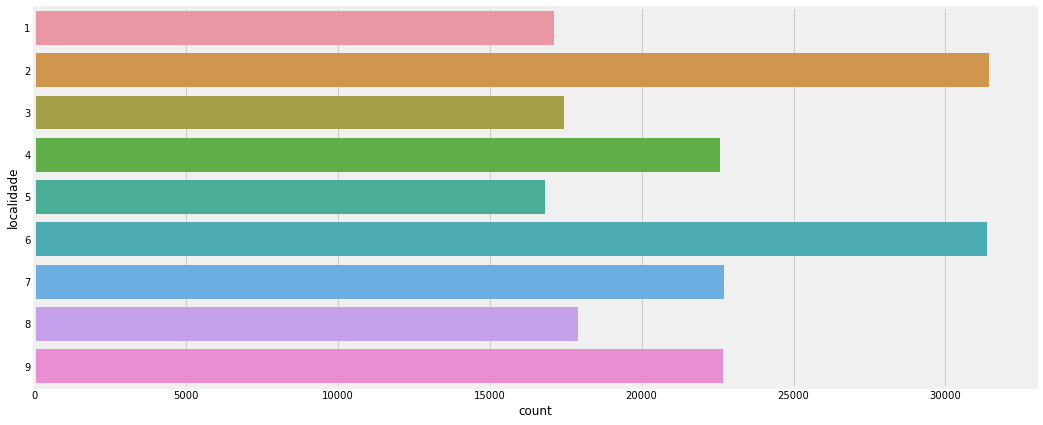

In [19]:
plt.figure(1,figsize=(16,7))
sns.countplot(y ='localidade', data = df)
plt.show()

Correlação entre as variáveis 

Correlação positiva:
Geralmente quando um cliente compra um determinado tipo de produto ele também escolhe um produto com correlação positiva.
A estratégia de recomendação deve levar em consideração a correlação dos produtos.

Bebida - Pizza /
Bebida - Sobremesa/
Sobremesa- Pizza/
Sobremesa - Salada/

Correlação negativa :

Bebida - Salada/
Pizza - Salada

A maioria das correlações negativas estão relacionadas a salada .
Correlação negativa significa que o item geralmente não é pedido em conjunto com outros itens.

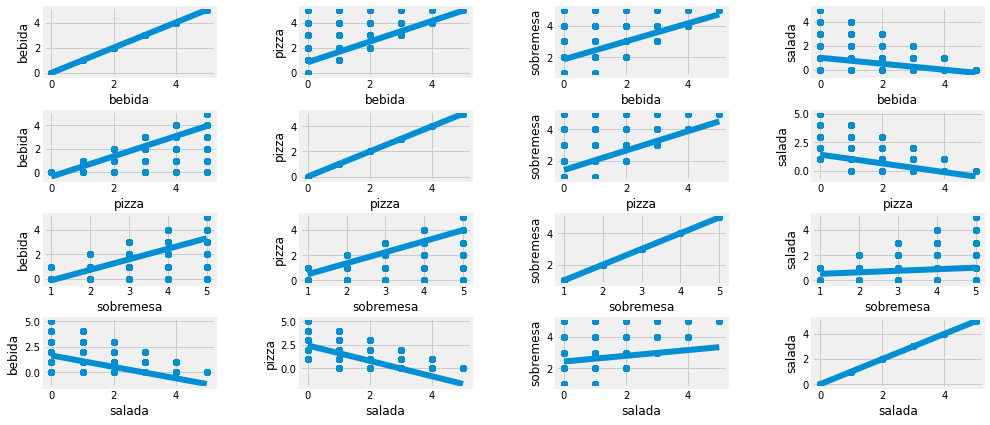

In [20]:
# Relação entre os itens 

plt.figure(1,figsize=(15,7))
n =0
for x in ['bebida','pizza','sobremesa','salada']:
        for y in ['bebida','pizza','sobremesa','salada']:
                n +=1
                plt.subplot(4,4,n)
                plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
                sns.regplot(x = x, y = y, data=df)
                plt.ylabel(y)
plt.show()

# Tratamento do Dataframe para aplicação do algoritmo Kmeans

In [13]:
# Filtrando o Dataframe por colunas

df_cluster = df[["bebida","pizza","sobremesa","salada"]]

In [14]:
df_cluster.head()

,bebida,pizza,sobremesa,salada
0,0,1,1,0
1,0,2,2,0
2,4,4,5,1
3,0,1,1,0
4,3,3,3,0


In [15]:
# Transformado o Dataframe em Values
X1 = df_cluster.loc[:,:].values

# Análise K-means

In [24]:
# within-clusters sum-of-squares
wcss = []

Vamos utilizar a curva de Elbow para avaliar a melhor quantidade de clusters , 
A melhor quantidade de cluster deve ser avaliada junto com o problema de negócio porém também existe a visão matemática.

Matematicamente a melhor quantidade de cluster é onde a curva começa se estabilizar 
significa que  a quantidade de agrupamentos em que as somas dos quadrados intra-clusters está se tornando menor.




In [25]:
# Loop para simular cluster de 2 a 10

for i in range (2,11):
    modelo  = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, 
                           random_state=101, copy_x=True, algorithm='elkan')
    modelo.fit(X1)
    wcss.append(modelo.inertia_)

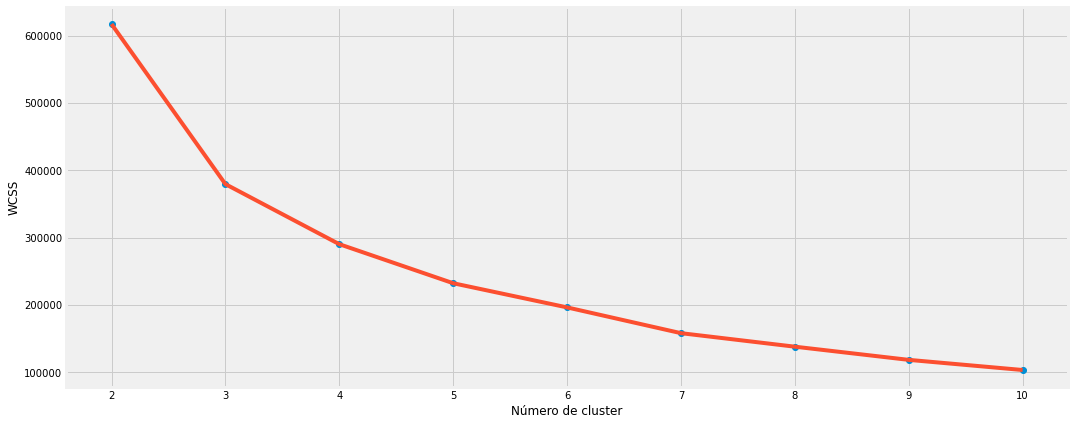

In [26]:
# Plot com a curva de Elbow

plt.figure (1,figsize=(16,7))
plt.plot(np.arange(2,11),wcss,"o")
plt.plot(np.arange(2,11),wcss,"-")
plt.ylabel("WCSS"),plt.xlabel("Número de cluster")
plt.show()

In [27]:
# Vamos filtrar Pizza e Sobremesa e aplicar o algoritmo.

X2 = df_cluster[['pizza','sobremesa']].values

In [28]:
wcss_2 = []

In [29]:
for i in range (2,11):
    modelo_2  = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, 
                           random_state=101, copy_x=True, algorithm='elkan')
    modelo_2.fit(X2)
    wcss_2.append(modelo_2.inertia_)

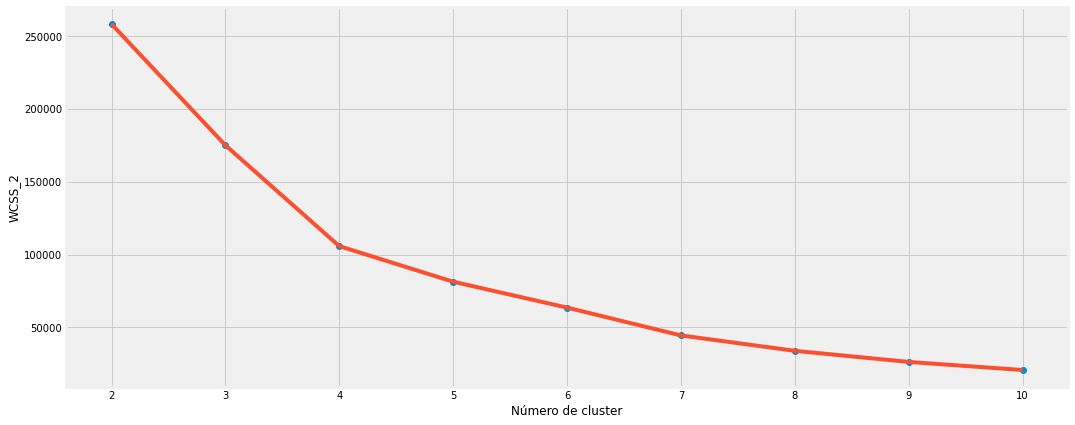

In [30]:
plt.figure(1,figsize=(16,7))
plt.plot(np.arange(2,11),wcss_2,"o")
plt.plot(np.arange(2,11),wcss_2,"-")
plt.ylabel("WCSS_2"),plt.xlabel("Número de cluster")
plt.show()

In [31]:
# Vamos utilizar 2 clusters para avaliar o modelo 

modelo_2  = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, 
                           random_state=101, copy_x=True, algorithm='elkan')
modelo_2.fit(X2)

modelo_2inertia = modelo_2.inertia_
modelo_2.center  = modelo_2.cluster_centers_
modelo_2labels = modelo_2.labels_

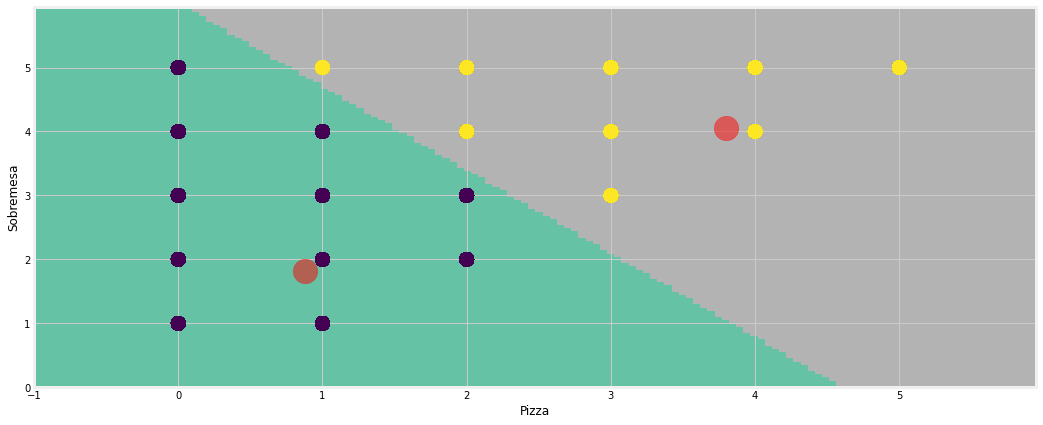

In [35]:
xmin,xmax = X2[:,0].min() -1, X2[:,0].max()+1
ymin,ymax = X2[:,1].min() -1, X2[:,1].max() +1
h = 0.05
xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
b = np.c_[xx.ravel(),yy.ravel()]
Z = modelo_2.predict(b)
Z = Z.reshape(xx.shape)
plt.figure(1,figsize = (16,7))
plt.clf()

plt.imshow(Z,interpolation= 'nearest',extent = (xx.min(),xx.max(),yy.min(),yy.max()), 
           cmap = plt.cm.Set2,aspect = 'auto',origin= 'lower')

plt.scatter(x = 'pizza', y = 'sobremesa', data = df_cluster, c = modelo_2labels, s = 200)
plt.scatter(x = modelo_2.center[: , 0], y =  modelo_2.center[: , 1], s = 600, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Sobremesa')
plt.show()


Análise

O ponto vermelho é o centróide de cada cluster (segmento).

No primeiro cluster (verde) estão  os clientes que pediram 0,1 ou 2 Pizzas. 
Podemos notar e confirmar a informação dos gráficos de correlação que todos os clientes que pediram pizzas também pediram sobremesas

No segundo cluster (área em cinza) estão os clientes que pediram 2, 3, 4 ou 5 Pizzas. 
A correlação positiva pode ser confirmada , conforme temos mais pedidos de pizzas também temos mais pedidos de sobremesa.

Recomendação:

Todos os clientes pedem sobremesas , poderiamos recomendar sobremesas aos clientes que pedem pizza ou oferecer sobremesas 
grátis na compra de um alto número de pizzas com intenção de impulsionar as vendas.



In [36]:
# Vamos filtrar Pizza e Saladas e aplicar o algoritmo.

X3 = df_cluster[['pizza','salada']].values

In [37]:
modelo_3  = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, 
                           random_state=101, copy_x=True, algorithm='elkan')
modelo_3.fit(X3)

modelo_3inertia = modelo_3.inertia_
modelo_3center  = modelo_3.cluster_centers_
modelo_3labels = modelo_3.labels_

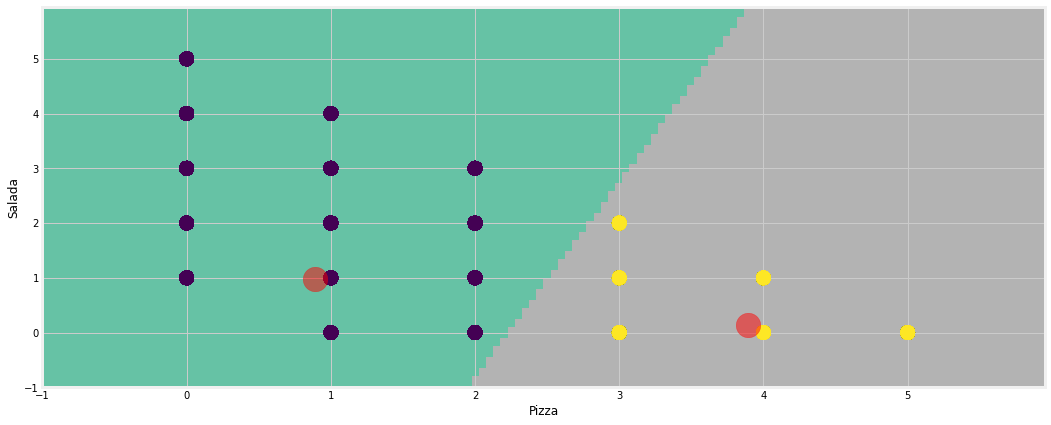

In [38]:
xmin,xmax = X3[:,0].min() -1, X3[:,0].max()+1
ymin,ymax = X3[:,1].min() -1, X3[:,1].max() +1
h = 0.05
xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
b = np.c_[xx.ravel(),yy.ravel()]
Z = modelo_3.predict(b)
Z = Z.reshape(xx.shape)
plt.figure(1,figsize = (16,7))
plt.clf()

plt.imshow(Z,interpolation= 'nearest',extent = (xx.min(),xx.max(),yy.min(),yy.max()), 
           cmap = plt.cm.Set2,aspect = 'auto',origin= 'lower')

plt.scatter(x = 'pizza', y = 'salada', data = df_cluster, c = modelo_3labels, s = 200)
plt.scatter(x = modelo_3center[: , 0], y =  modelo_3center[: , 1], s = 600, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Salada')
plt.show()


O ponto vermelho é o centróide de cada cluster 

No primeiro cluster temos os clientes que pediram 0,1 e 2 pizzas e saladas.
Podemos notar que quanto mais saladas menos pizzas são pedidas.

No segundo cluster temos os clientes que pediram mais pizzas e menos saladas.

Recomendação :

Com a finalidade de aumentar o faturamento poderiamos recomendar ou desenvolver fornecedores de pizzas fit ou veganas. 




In [53]:
# Pizza e Localidade

X4 = df[['pizza','localidade']].values

In [54]:
modelo_4  = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, 
                           random_state=101, copy_x=True, algorithm='elkan')
modelo_4.fit(X4)

modelo_4inertia = modelo_4.inertia_
modelo_4center  = modelo_4.cluster_centers_
modelo_4labels = modelo_4.labels_

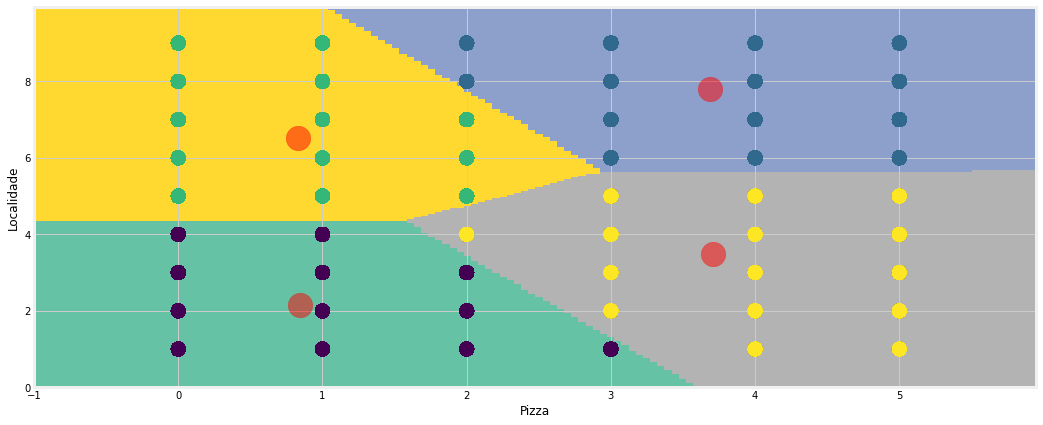

In [56]:
xmin,xmax = X4[:,0].min() -1, X4[:,0].max()+1
ymin,ymax = X4[:,1].min() -1, X4[:,1].max() +1
h = 0.05
xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
b = np.c_[xx.ravel(),yy.ravel()]
Z = modelo_4.predict(b)
Z = Z.reshape(xx.shape)
plt.figure(1,figsize = (16,7))
plt.clf()

plt.imshow(Z,interpolation= 'nearest',extent = (xx.min(),xx.max(),yy.min(),yy.max()), 
           cmap = plt.cm.Set2,aspect = 'auto',origin= 'lower')

plt.scatter(x = 'pizza', y = 'localidade', data = df, c = modelo_4labels, s = 200)
plt.scatter(x = modelo_4center[: , 0], y =  modelo_4center[: , 1], s = 600, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Localidade')
plt.show()


O ponto vermelho é o centróide de cada cluster.

Com este cluster podemos verificar 4 localidades 
As da esquerda com poucos pedidos de Pizzas e as da direita com alto volume de pedidos
Podemos fazer uma investigação nas localidades da esquerda para tentar aumentar as vendas.



In [35]:
df_2 = df[['pizza','localidade', 'dia_semana']]

In [36]:
df_2_g = df_2.groupby('localidade')['pizza'].sum().reset_index()

In [38]:
df_2_g

,localidade,pizza
0,1,14740
1,2,54900
2,3,15448
3,4,66464
4,5,14084
5,6,55488
6,7,66420
7,8,17120
8,9,66904


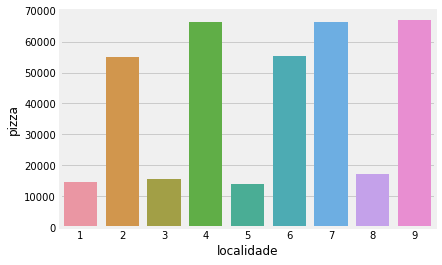

In [39]:
# Localidades que mais pediram Pizzas
sns.barplot(x = df_2_g.localidade, y = df_2_g.pizza)
plt.show()

In [40]:
df_2_w = df_2.groupby('dia_semana')['pizza'].sum().reset_index()

In [41]:
df_2_w

,dia_semana,pizza
0,Fri,53064
1,Mon,53174
2,Sat,53578
3,Sun,52462
4,Thu,52976
5,Tue,53350
6,Wed,52964


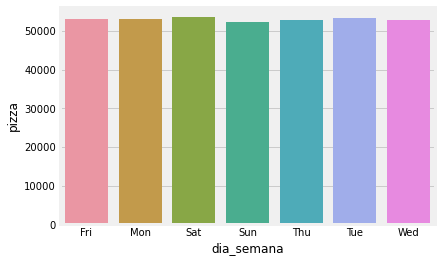

In [42]:
# Dias da semana x pedidos de pizza
# Podemos notar que existe uma uniformidade de pedidos durante os dias da semana
sns.barplot(x = df_2_w.dia_semana, y  = df_2_w.pizza)
plt.show()

In [43]:
# Salada e Localidade

X5 = df[['localidade','salada']].values

In [44]:
wcss_5 = []

In [45]:
for i in range(2,11):
    modelo_5  = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, 
                           random_state=101, copy_x=True, algorithm='elkan')
    modelo_5.fit(X5)
    wcss_5.append(modelo_5.inertia_)

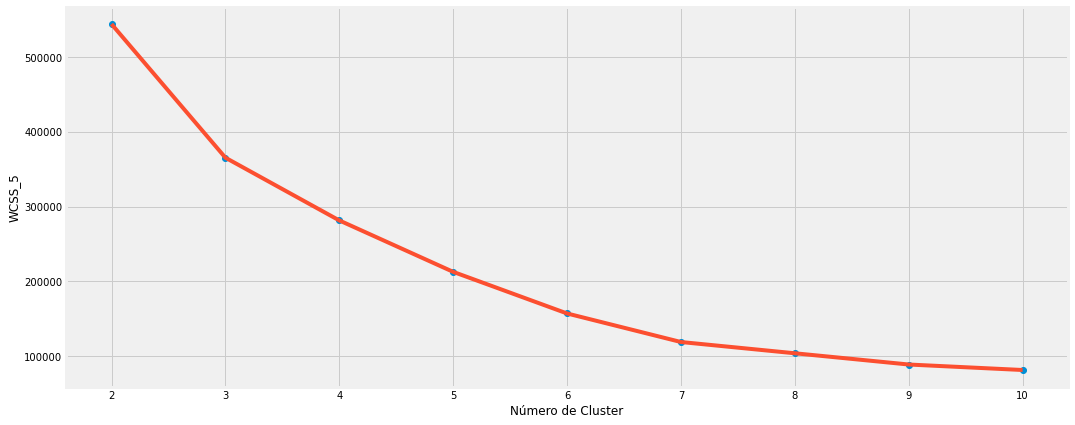

In [46]:
plt.figure(1,figsize = (16,7))
plt.plot(np.arange(2,11),wcss_5,"o")
plt.plot(np.arange(2,11),wcss_5,"-")
plt.xlabel("Número de Cluster"),plt.ylabel("WCSS_5")
plt.show()

In [47]:
modelo_5  = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, 
                           random_state=101, copy_x=True, algorithm='elkan')
modelo_5.fit(X5)

modelo_5inertia = modelo_5.inertia_
modelo_5center  = modelo_5.cluster_centers_
modelo_5labels = modelo_5.labels_

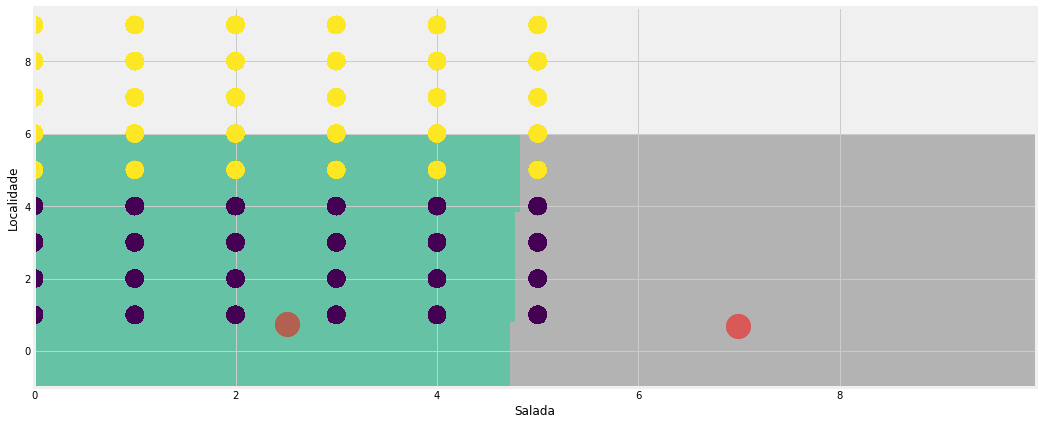

In [48]:
x_min,x_max = X5[:,0].min()-1 , X5[:,0].max()+1
y_min,y_max = X5[:,1].min()-1 , X5[:,1].max()+1

h= 0.05

xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

b = np.c_[xx.ravel(),yy.ravel()]
z = modelo_5.predict(b)
z = z.reshape(xx.shape)

plt.figure(1, figsize = (16,7))
plt.clf()

plt.imshow(z,interpolation= 'nearest',extent = (xx.min(),xx.max(),yy.min(),yy.max()), 
           cmap = plt.cm.Set2,aspect = 'auto',origin= 'lower')

plt.scatter(x = 'salada', y = 'localidade', data = df, c = modelo_5labels, s = 300)
plt.scatter(x = modelo_5center[: , 0], y =  modelo_5center[: , 1], s = 600, c = 'red', alpha = 0.5)
plt.xlabel('Salada')
plt.ylabel('Localidade')
plt.show()



Podemos notar que o máximo de pedidos de saladas é 5 
Temos dois centróides um concentrado o baixo valor de pedidos e outra na área cinza com um volume de 5 pedidos
Podemos notar que dificilmente um cliente pede uma alta quantidade de Saladas

In [54]:
df_3 = df[['salada','localidade','dia_semana']]

In [55]:
df_3_g = df_3.groupby('localidade')['salada'].sum().reset_index()

In [60]:
df_3_g['salada'].sum()

142274

In [56]:
df_3_g

,localidade,salada
0,1,25920
1,2,6428
2,3,25766
3,4,8516
4,5,25802
5,6,6500
6,7,8694
7,8,26228
8,9,8420


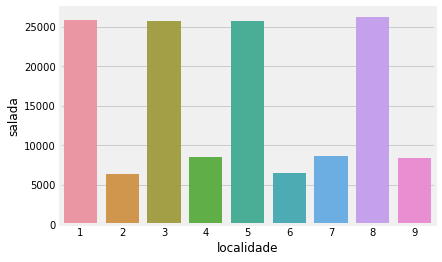

In [57]:
# Regiões com maiores pedidos de saladas
sns.barplot(x = df_3_g.localidade,y = df_3_g.salada)
plt.show()

In [58]:
df_3_w = df_3.groupby('dia_semana')['salada'].sum().reset_index()

In [61]:
df_3_w['salada'].sum()

142274

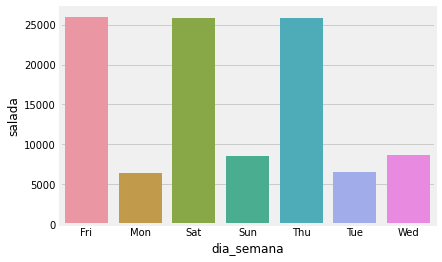

In [62]:
# Dias da semana que mais vendem saladas, Sexta_Feira, Sabádo, Quinta_Feira.
sns.barplot(x = df_3_w.dia_semana,y = df_3_g.salada)
plt.show()

In [31]:
# Pizza , Saladas , Sobremesas

X6 = df[['pizza','sobremesa','salada','localidade']].values

In [32]:
wcss_6 = []

In [33]:
for i in range(2,11):
    modelo_6  = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, 
                           random_state=101, copy_x=True, algorithm='elkan')
    modelo_6.fit(X6)
    wcss_6.append(modelo_6.inertia_)

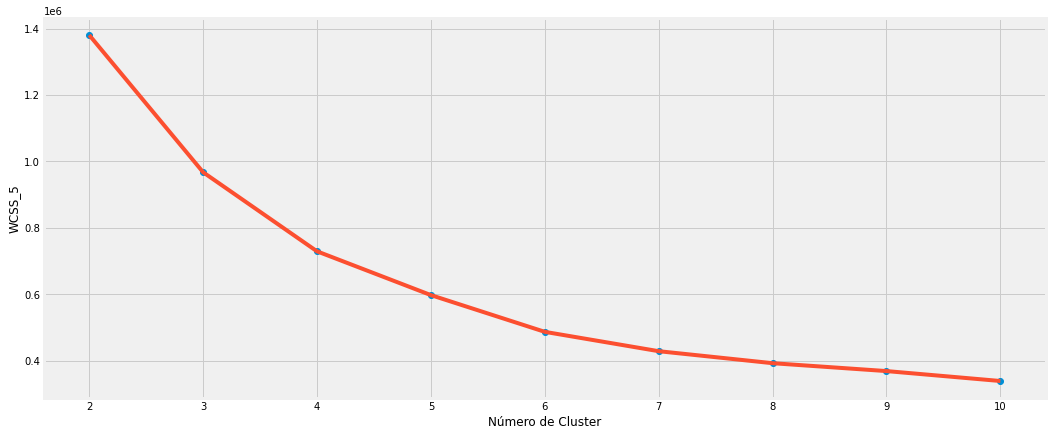

In [34]:
plt.figure(1,figsize = (16,7))
plt.plot(np.arange(2,11),wcss_6,"o")
plt.plot(np.arange(2,11),wcss_6,"-")
plt.xlabel("Número de Cluster"),plt.ylabel("WCSS_5")
plt.show()

In [40]:
modelo_6  = KMeans(n_clusters= 3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, 
                           random_state=101, copy_x=True, algorithm='elkan')
modelo_6.fit(X6)

modelo_6inertia = modelo_6.inertia_
modelo_6center  = modelo_6.cluster_centers_
modelo_6labels = modelo_6.labels_
modelo_6features = modelo_6.n_features_in_
modelo_6iterations  = modelo_6.n_iter_

In [40]:
modelo_6labels.shape

(200000,)

In [70]:
modelo_6labels

array([0, 0, 2, ..., 1, 1, 1])

In [36]:
modelo_6features

4

In [38]:
modelo_6iterations

5

In [42]:
cluster  = modelo_6.predict(X6)

In [44]:
cluster

array([0, 0, 2, ..., 1, 1, 1])

In [45]:
df['cluster'] = cluster

In [46]:
df.head()

,Index,id_transacao,horario_pedido,localidade,bebida,pizza,sobremesa,salada,mes,dia_semana,cluster
0,0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0,01,Tue,0
1,1,0x100058,2019-05-05 00:08:00,6,0,2,2,0,05,Sun,0
2,2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1,01,Mon,2
3,3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0,02,Sat,0
4,4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0,06,Sun,1


In [47]:
df.describe()

,Index,localidade,bebida,pizza,sobremesa,salada,cluster
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,99999.500000,5.004700,1.239590,1.857840,2.569210,0.711370,0.899680
std,57735.171256,2.544805,1.627882,1.588585,1.332081,1.086521,0.775138
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,49999.750000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,99999.500000,5.000000,0.000000,1.000000,2.000000,0.000000,1.000000
75%,149999.250000,7.000000,3.000000,3.000000,4.000000,1.000000,2.000000
max,199999.000000,9.000000,5.000000,5.000000,5.000000,5.000000,2.000000


In [56]:
df_0 = df[df['cluster']==0]

In [57]:
df_0.describe()

,Index,localidade,bebida,pizza,sobremesa,salada,cluster
count,71122.000000,71122.000000,71122.000000,71122.000000,71122.000000,71122.000000,71122.0
mean,100059.740530,6.653216,0.326453,0.898259,1.867383,0.969123,0.0
std,57714.574439,1.307229,0.604702,0.768795,0.916450,1.195410,0.0
min,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.0
25%,50270.750000,6.000000,0.000000,0.000000,1.000000,0.000000,0.0
50%,99997.000000,6.000000,0.000000,1.000000,2.000000,0.000000,0.0
75%,150269.750000,8.000000,1.000000,1.000000,2.000000,2.000000,0.0
max,199994.000000,9.000000,2.000000,2.000000,5.000000,5.000000,0.0


In [58]:
df_0.groupby('localidade')["bebida","pizza","sobremesa","salada"].sum()

,bebida,pizza,sobremesa,salada
localidade,,,,
5,2174,6224,31424,25200
6,6664,32940,38912,5972
7,6130,8864,15178,6314
8,2564,7356,32988,25632
9,5686,8502,14310,5808


In [61]:
df_1 = df[df['cluster']==1]

In [62]:
df_1.describe()

,Index,localidade,bebida,pizza,sobremesa,salada,cluster
count,77820.000000,77820.000000,77820.000000,77820.000000,77820.000000,77820.000000,77820.0
mean,99920.750501,2.313698,0.643639,1.354408,2.199409,0.845001,1.0
std,57793.830425,0.985392,1.110929,1.272301,1.162492,1.153797,0.0
min,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0
25%,49751.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.0
50%,100001.500000,2.000000,0.000000,1.000000,2.000000,0.000000,1.0
75%,149749.000000,3.000000,1.000000,2.000000,3.000000,1.000000,1.0
max,199999.000000,4.000000,5.000000,5.000000,5.000000,5.000000,1.0


In [63]:
df_1.groupby('localidade')["bebida","pizza","sobremesa","salada"].sum()

,bebida,pizza,sobremesa,salada
localidade,,,,
1,8624,14740,40660,25920
2,15390,54900,61328,6428
3,7242,13238,39004,25766
4,18832,22522,30166,7644


In [64]:
df_2 = df[df['cluster']==2]

In [65]:
df_2.describe()

,Index,localidade,bebida,pizza,sobremesa,salada,cluster
count,51058.000000,51058.000000,51058.000000,51058.000000,51058.000000,51058.000000,51058.0
mean,100035.613028,6.809863,3.419875,3.961808,4.110463,0.148654,2.0
std,57675.368503,1.850887,1.238352,0.706484,0.671599,0.410263,0.0
min,2.000000,3.000000,0.000000,2.000000,3.000000,0.000000,2.0
25%,49926.750000,5.000000,3.000000,3.000000,4.000000,0.000000,2.0
50%,99998.500000,7.000000,4.000000,4.000000,4.000000,0.000000,2.0
75%,149925.750000,9.000000,4.000000,4.000000,5.000000,0.000000,2.0
max,199995.000000,9.000000,5.000000,5.000000,5.000000,3.000000,2.0


In [66]:
df_2.groupby('localidade')["bebida","pizza","sobremesa","salada"].sum()

,bebida,pizza,sobremesa,salada
localidade,,,,
3,1620,2210,2210,0
4,41188,43942,44814,872
5,6654,7860,8462,602
6,9214,22548,23076,528
7,53676,57556,59936,2380
8,8138,9764,10360,596
9,54122,58402,61014,2612


Foram criados 3 clusters com determinados perfis de pedidos 

Cluster 0 : Maiores médias de pedidos de Sobremesas e Saladas 
Localidades : 1/2/3/4
    
Cluster 1 : Maiores médias de pedidos de Sobremesas e Pizzas 
Localidades : 1/2/3/4

Cluster 2 : Maiores médias de pedidos de Sobremesas e Pizzas e Bebidas 
Localidades : 3/4/5/6/7/8/9